In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns

# IMPORTS
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

file = pd.read_csv("data.csv")

file.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
file.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
file.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df = file.drop(columns=['Unnamed: 32'])

In [6]:
df2 = df.drop(columns=['id'])

In [7]:
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
df_le = df2.loc[:, ["diagnosis"]]
df_le["diagnosis"] = [1 if x == "M" else 0 for x in df_le.diagnosis]
df_le.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [9]:
num_cols = []

for col in df2.columns:
    if (df2[col].dtype == "float64"):
        print(col)
        num_cols.append(col)
        
df_num = df2.loc[:, num_cols]
df_num.head()

radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# scaler
scaler = StandardScaler().fit(df_num)
df_scale = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
df_scale.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [11]:
# scale training set
df_scale2 = pd.concat([df_scale, df_le], axis=1)
df_scale2

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


In [12]:
corrs = abs(df_scale2.corr())["diagnosis"].sort_values(ascending=False)
corrs

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

In [13]:
corrs.index

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_se', 'fractal_dimension_mean',
       'texture_se', 'symmetry_se'],
      dtype='object')

In [14]:
# LOW correlations <.50
cols_to_drop = ['texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_se', 'fractal_dimension_mean',
       'texture_se', 'symmetry_se']

cols_keep = [x for x in df_scale2 if x not in cols_to_drop]
df_scale3 = df_scale2.loc[:, cols_keep]
df_scale3.head()

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,1.097064,1.269934,0.984375,3.283515,2.652874,2.532475,2.489734,2.833031,2.487578,1.886690,2.303601,2.001237,2.616665,2.109526,2.296076,1
1,1.829821,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,0.263327,0.742402,1.805927,1.535126,1.890489,-0.430444,-0.146749,1.087084,1
2,1.579888,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,0.850928,1.181336,1.511870,1.347475,1.456285,1.082932,0.854974,1.955000,1
3,-0.768909,-0.592687,-0.764464,3.402909,1.915897,1.451707,0.326373,0.286593,-0.288378,-0.281464,-0.249939,-0.550021,3.893397,1.989588,2.175786,1
4,1.750297,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,1.273189,1.190357,1.298575,1.338539,1.220724,-0.313395,0.613179,0.729259,1


In [17]:
X = df_scale3.loc[:, ['concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se']].values
y = df_scale3["diagnosis"].values

In [18]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, test_size=.25, stratify=y)

print(len(X_train) / len(X))
print(len(X_test) / len(X))

0.7486818980667839
0.2513181019332162


In [19]:
# Initialize the model
model1 = LogisticRegression()

# FIT THE MODEL
model1.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model1.predict(X_train)
test_preds = model1.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       267
           1       0.95      0.94      0.94       159

    accuracy                           0.96       426
   macro avg       0.96      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426

[[259   8]
 [ 10 149]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[86  4]
 [ 3 50]]


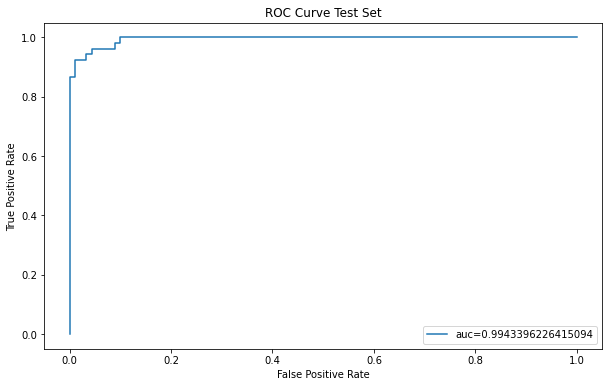

In [20]:
y_pred_proba = model1.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [21]:
# Initialize the model
model2 = KNeighborsClassifier(n_neighbors=5)

# FIT THE MODEL
model2.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model2.predict(X_train)
test_preds = model2.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       267
           1       0.95      0.93      0.94       159

    accuracy                           0.96       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426

[[259   8]
 [ 11 148]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[86  4]
 [ 3 50]]


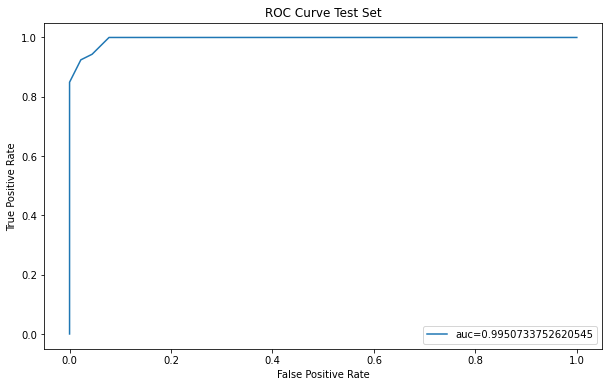

In [22]:
y_pred_proba = model2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [25]:
# Initialize the model
model3 = SVC(probability=True)

# FIT THE MODEL
model3.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model3.predict(X_train)
test_preds = model3.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       267
           1       0.97      0.92      0.94       159

    accuracy                           0.96       426
   macro avg       0.96      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426

[[262   5]
 [ 13 146]]

Testing SET
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[86  4]
 [ 3 50]]


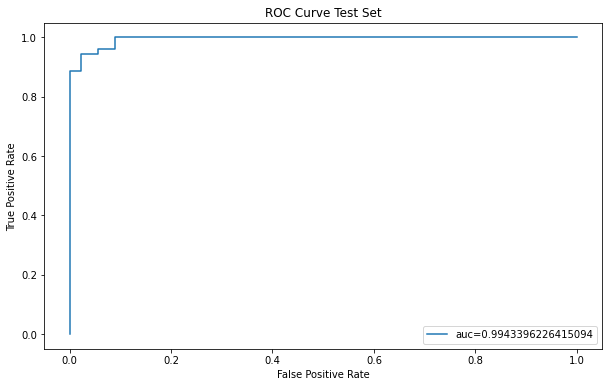

In [26]:
y_pred_proba = model3.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()

In [27]:
# Initialize the model
model4 = RandomForestClassifier()

# FIT THE MODEL
model4.fit(X_train, y_train)

# EVALUATE the MODEL
train_preds = model4.predict(X_train)
test_preds = model4.predict(X_test)

# PRINT the METRICS
print("TRAINING SET")

class_report_train = classification_report(y_train, train_preds)
conf_matrix_train = confusion_matrix(y_train, train_preds)

print(class_report_train)
print(conf_matrix_train)

print()

# PRINT the METRICS
print("Testing SET")

class_report_test = classification_report(y_test, test_preds)
conf_matrix_test = confusion_matrix(y_test, test_preds)

print(class_report_test)
print(conf_matrix_test)

TRAINING SET
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       267
           1       1.00      1.00      1.00       159

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

[[267   0]
 [  0 159]]

Testing SET
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        90
           1       0.91      0.96      0.94        53

    accuracy                           0.95       143
   macro avg       0.94      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

[[85  5]
 [ 2 51]]


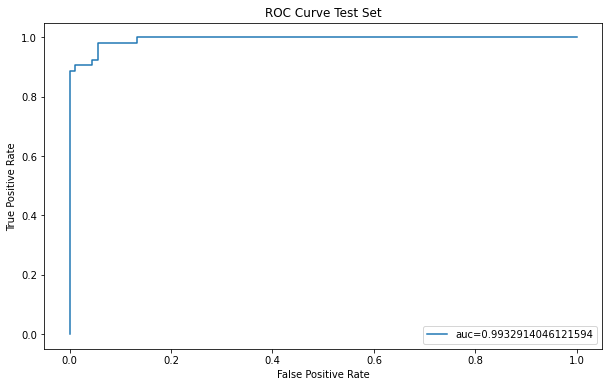

In [28]:
y_pred_proba = model4.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Test Set")
plt.legend(loc=4)
plt.show()